In [1]:
import pandas as pd
import numpy as np

In [2]:
feature=list()
with open('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/features.txt') as f:
  feature=[line.split()[1] for line in f.readlines()]
print('Number of Features {}'.format(len(feature)))

Number of Features 561


# Loading the Train Data

In [3]:
X_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/train/X_train.txt',delim_whitespace=True,header=None,encoding='latin-1')
X_train.columns=feature

X_train['subject']=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/train/subject_train.txt',header=None,squeeze=True)
y_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/train/y_train.txt',names=['Activity'],squeeze=True)
y_train_labels=y_train.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})

train=X_train
train['Activity']=y_train
train['ActivityName']=y_train_labels


<ipython-input-3-7944238de263>:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train['subject']=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/train/subject_train.txt',header=None,squeeze=True)
<ipython-input-3-7944238de263>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/train/y_train.txt',names=['Activity'],squeeze=True)


In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [5]:
train.shape

(7352, 564)

# Loading the Test Data

In [6]:
X_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/test/X_test.txt',delim_whitespace=True,header=None,encoding='latin-1')
X_test.columns=feature

X_test['subject']=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/test/subject_test.txt',header=None,squeeze=True)

y_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/test/y_test.txt',names=['Activity'],squeeze=True)
y_test_labels=y_train.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})

test=X_test
test['Activity']=y_test
test['ActivityName']=y_test_labels


<ipython-input-6-d70f383047d4>:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test['subject']=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/test/subject_test.txt',header=None,squeeze=True)
<ipython-input-6-d70f383047d4>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/test/y_test.txt',names=['Activity'],squeeze=True)


In [7]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [8]:
test.shape

(2947, 564)

# Data Cleaning

Check for duplicate


In [9]:
print('Duplicate value in train data:',sum(train.duplicated()))
print('Duplicate value in test data:',sum(test.duplicated()))

Duplicate value in train data: 0
Duplicate value in test data: 0


Check for Nan Value

In [10]:
print('We have {} Nan value in train'.format(train.isnull().values.sum()))
print('We have {} Nan value in test'.format(test.isnull().values.sum()))

We have 0 Nan value in train
We have 0 Nan value in test


check for data inbalance

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

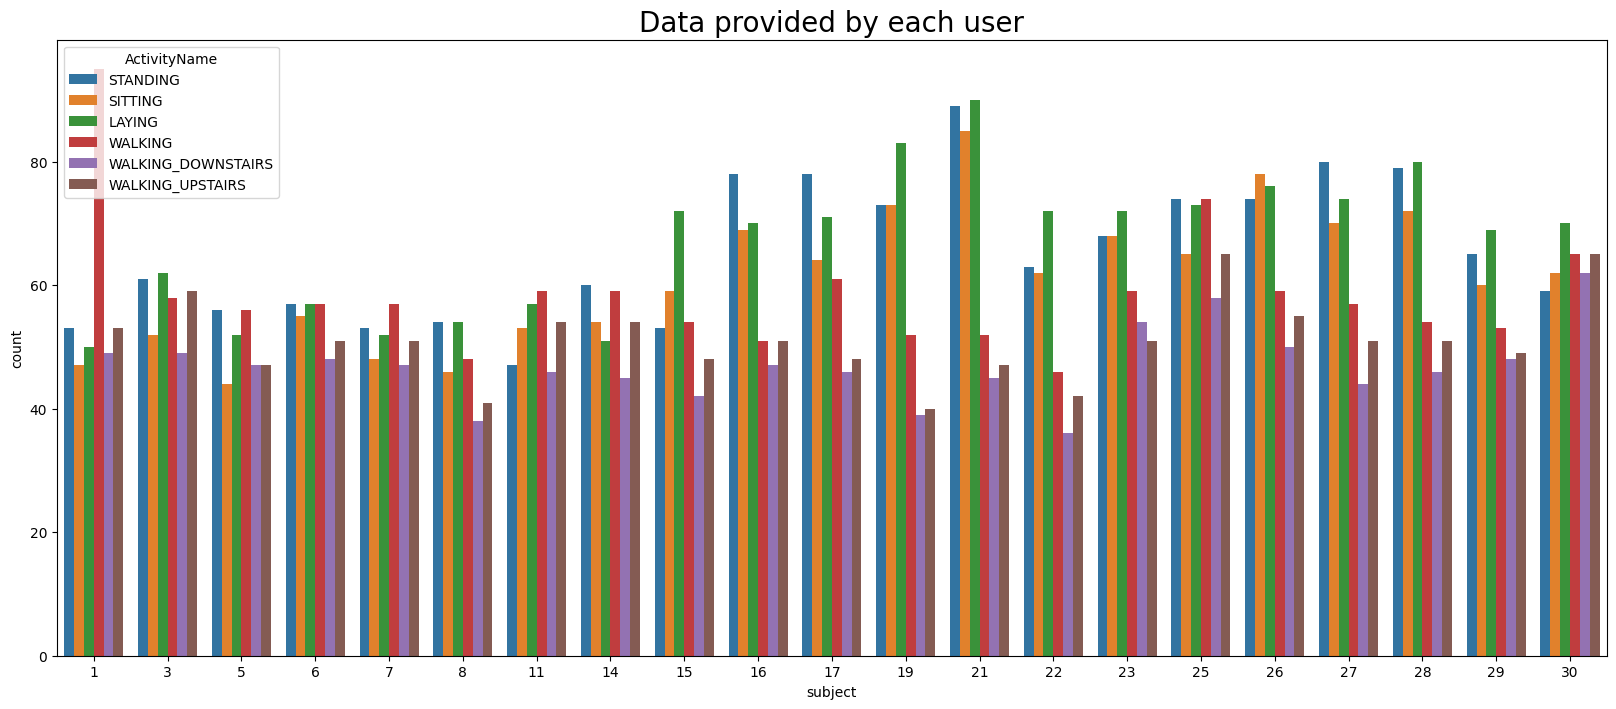

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(data=train,x='subject',hue='ActivityName')
plt.title('Data provided by each user',fontsize=20)
plt.show()

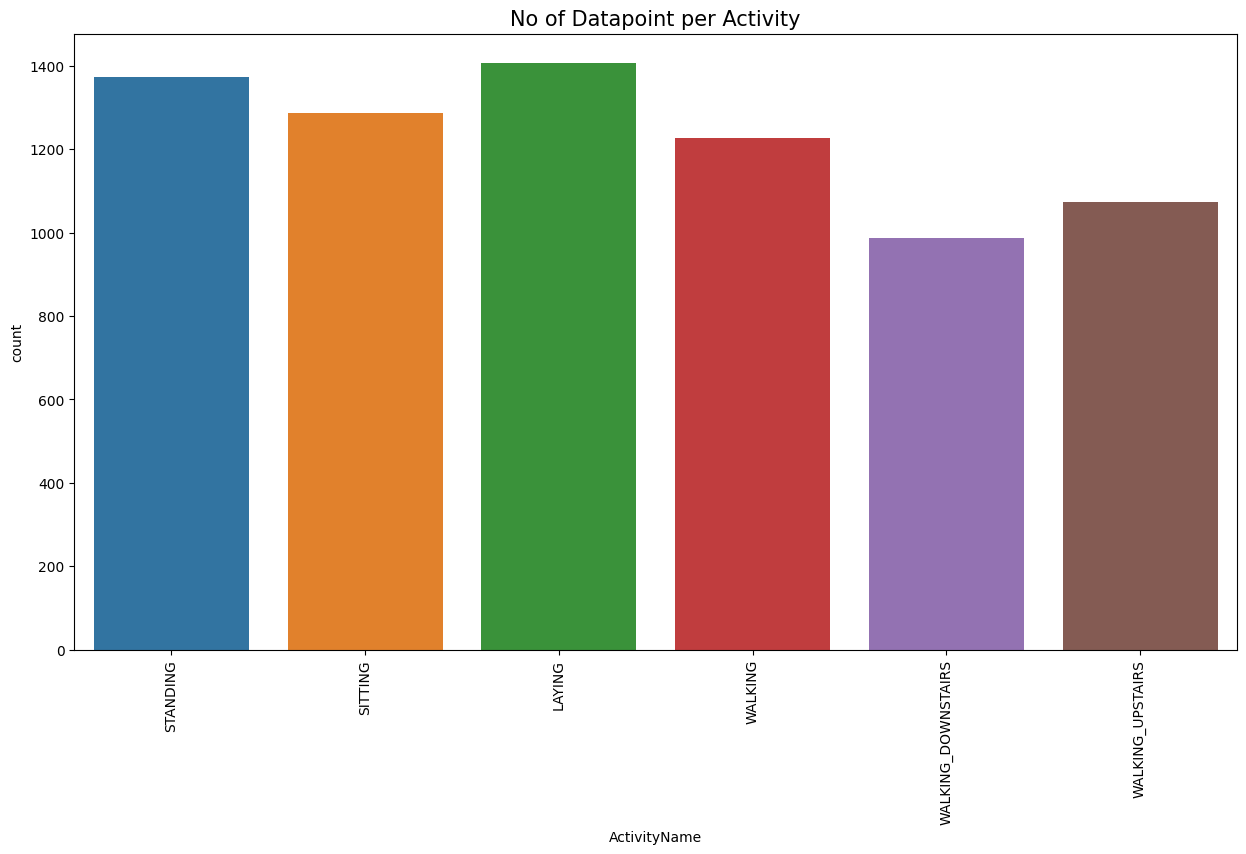

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(data=train, x='ActivityName')
plt.title('No of Datapoint per Activity',fontsize=15)
plt.xticks(rotation=90)
plt.show()

Changing feature names

In [14]:
columns=train.columns

columns=columns.str.replace('[()]','')
columns=columns.str.replace('[-]','')
columns=columns.str.replace('[,]','')

train.columns = columns
test.columns = columns


<ipython-input-14-0de4c99b3a6f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  columns=columns.str.replace('[()]','')
<ipython-input-14-0de4c99b3a6f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns=columns.str.replace('[-]','')
<ipython-input-14-0de4c99b3a6f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns=columns.str.replace('[,]','')


In [15]:
test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [18]:
train.to_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/train.csv',index=False)
test.to_csv('/content/drive/MyDrive/Colab Notebooks/data/UCI_HAR_Dataset/test.csv',index=False)

**Stationary and Moving Activity are totaly different**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/pyt

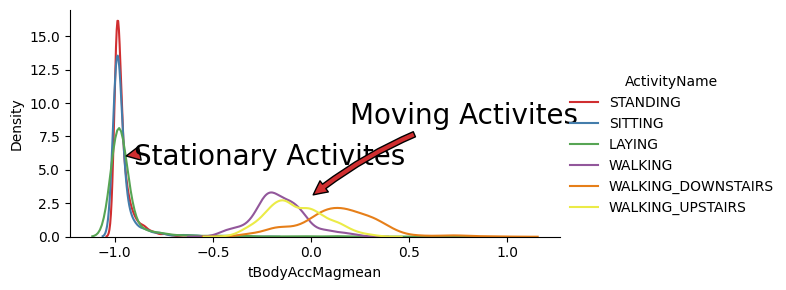

In [17]:
sns.set_palette('Set1',desat=0.80)
facegrid=sns.FacetGrid(train,hue='ActivityName',aspect=2)
facegrid.map(sns.distplot,'tBodyAccMagmean',hist=False)\
     .add_legend()
plt.annotate('Stationary Activites',xy=(-0.956,6),xytext=(-0.9,6),size=20,\
             va='center',ma='left',\
             arrowprops=dict(arrowstyle='simple',connectionstyle='arc3,rad=0.1'))

plt.annotate('Moving Activites',xy=(0,3),xytext=(0.2,9),size=20,\
             va='center',ma='left',\
             arrowprops=dict(arrowstyle='simple',connectionstyle='arc3,rad=0.1'))
plt.show()

# Applying t-sne on data
(t-Distributed Stochastic Neighbor Embedding)

In [18]:
from sklearn.manifold import TSNE

In [27]:
def perform_tsne(X_data,y_data,perplexities,n_iter=1000,img_name_prefix='t-sne'):
  for index,perplexity in enumerate(perplexities):
    #perform t-sne
    print('\nperforming tsne with perplexity {} and with {} iteration at max'.format(perplexity,n_iter))
    X_reduced=TSNE(verbose=2,perplexity=perplexity).fit_transform(X_data)
    print('Done.')

    #prepare the data for seaborn
    print('Creating plot for this t-sne visualization')
    df=pd.DataFrame({'x':X_reduced[:,0],'y':X_reduced[:,1],'label':y_data})

    #draw the plot in appropriate place in grid
    sns.lmplot(data=df,x='x',y='y',hue='label',fit_reg=False,height=8,\
               palette='Set1',markers=['^', 'v', 's', 'o', '1', '2'])
    plt.title('perplexity : {} and max_iter: {}'.format(perplexity,n_iter))
    img_name=img_name_prefix + '_prep_{}_iter_{}.png'.format(perplexity,n_iter)
    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)
    plt.show()
    print('Done.')


performing tsne with perplexity 2 and with 1000 iteration at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.021s...
[t-SNE] Computed neighbors for 7352 samples in 2.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 119.3310547, gradient norm = 0.0444408 (50 iterations in 4.505s)
[t-SNE] Iteration 100: error = 105.1161575, gradient norm = 0.0240529 (50 iterations in 2

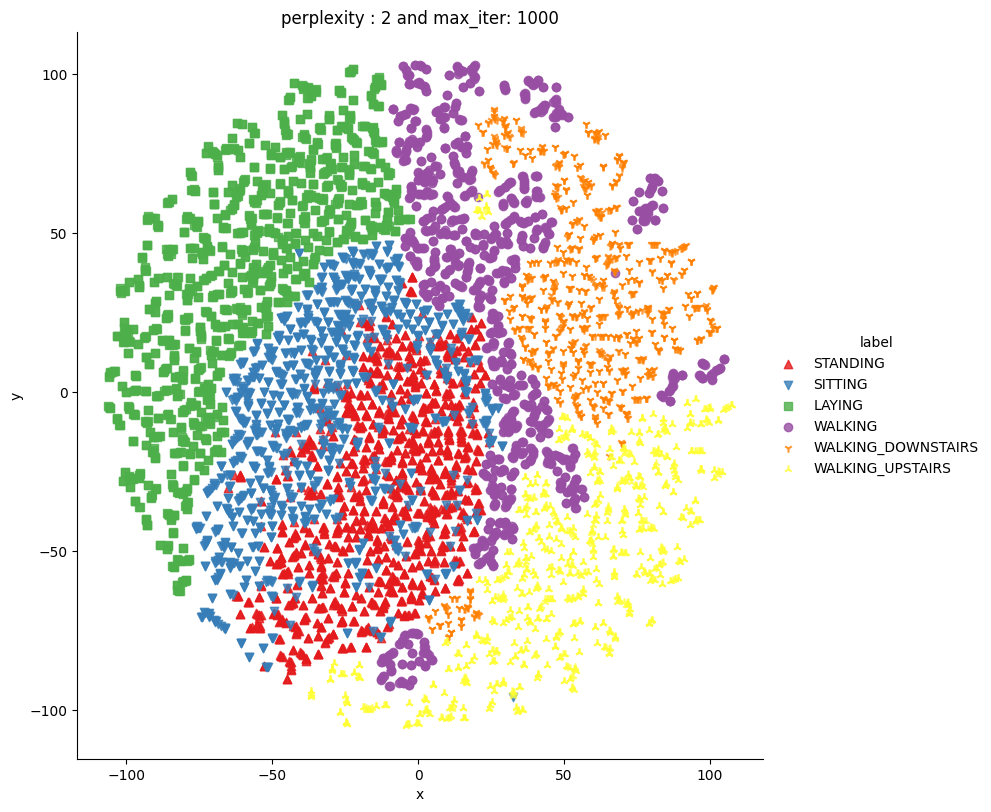

Done.

performing tsne with perplexity 5 and with 1000 iteration at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 3.749s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.076s
[t-SNE] Iteration 50: error = 107.1604462, gradient norm = 0.0391875 (50 iterations in 5.125s)
[t-SNE] Iteration 100: error = 95.6756973, gradient norm = 0.0150885 (50 iteration

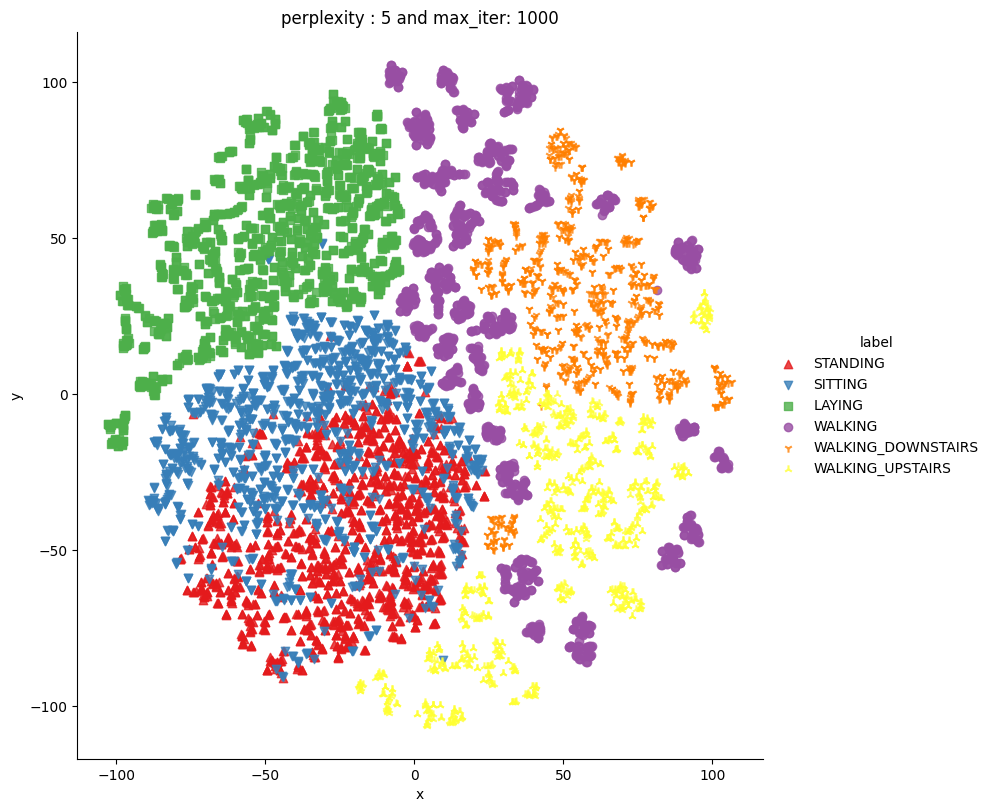

Done.

performing tsne with perplexity 10 and with 1000 iteration at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 2.269s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.074s
[t-SNE] Iteration 50: error = 97.9054260, gradient norm = 0.0345737 (50 iterations in 8.025s)
[t-SNE] Iteration 100: error = 88.9406967, gradient norm = 0.0103697 (50 iteration

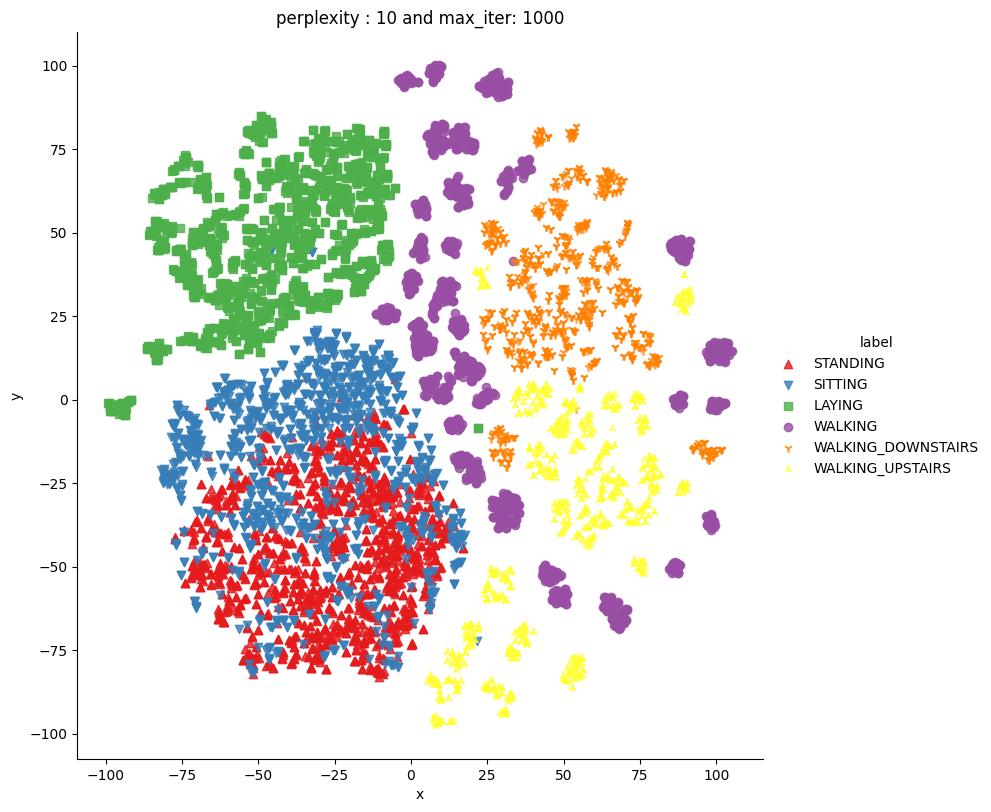

Done.

performing tsne with perplexity 20 and with 1000 iteration at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 2.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.222s
[t-SNE] Iteration 50: error = 89.2966766, gradient norm = 0.0314529 (50 iterations in 7.843s)
[t-SNE] Iteration 100: error = 82.9602203, gradient norm = 0.0077456 (50 iteration

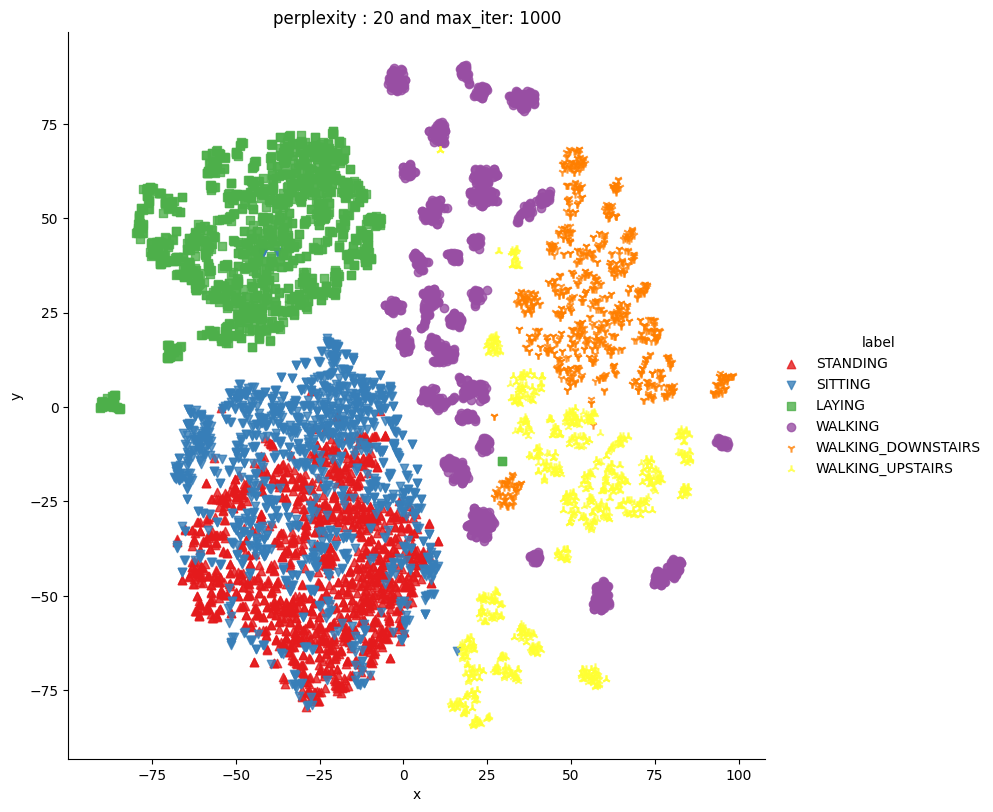

Done.

performing tsne with perplexity 30 and with 1000 iteration at max
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.024s...
[t-SNE] Computed neighbors for 7352 samples in 2.414s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348515
[t-SNE] Computed conditional probabilities in 0.210s
[t-SNE] Iteration 50: error = 84.5503998, gradient norm = 0.0271591 (50 iterations in 7.917s)
[t-SNE] Iteration 100: error = 79.7021637, gradient norm = 0.0069817 (50 iteration

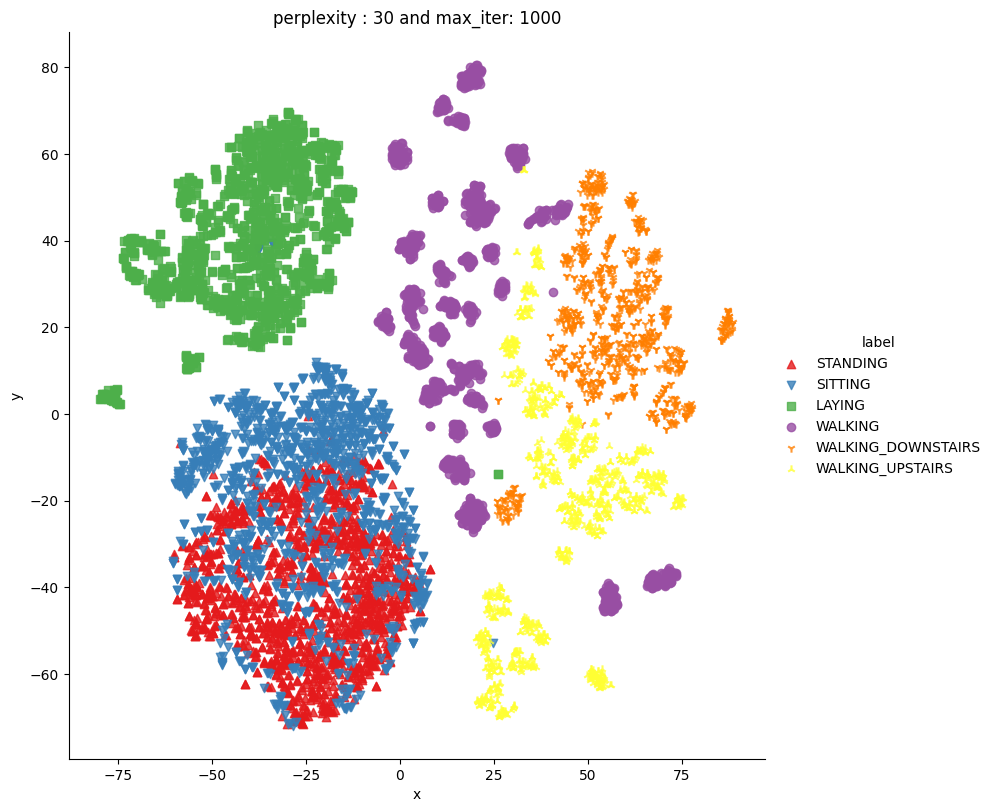

Done.


In [28]:
X_pre_tsne=train.drop(['subject','Activity','ActivityName'],axis=1)
y_pre_tsne=train['ActivityName']
perform_tsne(X_data=X_pre_tsne,y_data=y_pre_tsne,perplexities=[2,5,10,20,30])